In [1]:
import nltk
import pandas as pd
import numpy as np

### importing train/test data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.isnull().sum()
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_data.isnull().sum()
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


### cleaning data

In [5]:
category = train_data['target']
features = ('text')
x_train = train_data[features]
x_test = test_data[features]
x_test

0                      Just happened a terrible car crash
1       Heard about #earthquake is different cities, s...
2       there is a forest fire at spot pond, geese are...
3                Apocalypse lighting. #Spokane #wildfires
4           Typhoon Soudelor kills 28 in China and Taiwan
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm in RI worse than last hurricane. My city...
3260    Green Line derailment in Chicago http://t.co/U...
3261    MEG issues Hazardous Weather Outlook (HWO) htt...
3262    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 3263, dtype: object

### using count vectorizer 

In [6]:
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.feature_extraction.text import TfidfVectorizer as TFD
from sklearn.ensemble import RandomForestClassifier as RVC
from sklearn.model_selection import train_test_split as tts

In [8]:
cv = CV(min_df = 0.01,max_df = 0.9,ngram_range= (1,3))
x_train_features = cv.fit_transform(x_train)
x_test_features = cv.transform(x_test)

In [9]:
train_x,test_x,train_y,test_y = tts(x_train_features,category)

In [10]:
algo = RVC()
algo.fit(train_x,train_y)
algo.score(test_x,test_y)

0.7400210084033614

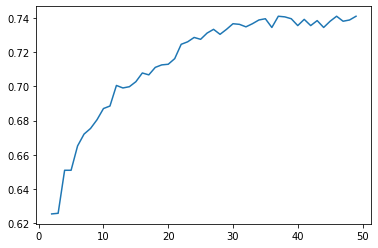

In [23]:
from matplotlib import pyplot as pplot
x_axis = []
y_axis = []
for i in range(2,50):
    algo = RVC(max_depth = i)
    algo.fit(train_x,train_y)
    sc = algo.score(test_x,test_y)
    y_axis.append(sc)
    x_axis.append(i)

pplot.plot(x_axis,y_axis)

In [11]:
algo = RVC()
algo.fit(x_train_features,category)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
from sklearn.svm import SVC
algo2 = SVC()
algo2.fit(train_x,train_y)
algo2.score(test_x,test_y)

0.75

In [13]:
predictions = algo2.predict(x_test_features)
np.savetxt(fname='preds.csv', X = predictions, fmt='%s')
ans = {
    'id' : test_data['id'],
    'target' : predictions
}
ans = pd.DataFrame(ans)
ans.to_csv('pred.csv',index = False)